## MCTSを用いた五目並べの実践

In [1]:
from __future__ import division

import os
import shutil
from copy import deepcopy
from tqdm import tqdm
from mcts import mcts
from gomoku import GomokuState
from gravity_gomoku import GravityGomokuState
from functools import reduce
import operator
import importlib
from graphviz import Graph

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# %matplotlib inline

### 五目並べ状態を設定
- 状態にはインターフェースに沿っていれば任意のゲームを指定できる。

In [2]:
N = 7
K = 5
# initialState = GravityGomokuState(N, K)
initialState = GomokuState(N, K)

### 探索アルゴリズムを設定
- cleaverSearcher: MCTSによる賢いアルゴリズム  
- foolSearhcer: UCTの探索項を0にしたアルゴリズム

In [3]:
searcher = mcts(timeLimit=1000)
cleaverSearcher = mcts(timeLimit=100000)
foolSearcher = mcts(timeLimit=100000, explorationConstant=0)

In [4]:
state = initialState

In [5]:
state.board = [
    [0,0,0,0,0,0,0],
    [1,0,0,1,1,0,0],
    [0,1,0,0,-1,0,0],
    [0,0,-1,-1,-1,0,0],
    [0,1,-1,0,0,0,0],
    [0,0,0,0,0,0,0],
     [0,0,0,0,0,0,0]
]

In [45]:
print(state.draw_board())
print("------")

while True:
    print("Player:{}".format(state.currentPlayer))
    
    # 最適な手を探索
    # ■ cleaver vs foolの場合
#     currentPlayer = state.getCurrentPlayer()
#     if currentPlayer == 1:
#         searcher = cleaverSearcher
#     elif currentPlayer == -1:
#         searcher = foolSearcher
    # ■ cleaver vs cleaver の場合
    searcher = cleaverSearcher
    action = searcher.search(initialState=state)
    print(action)
    
    # 最適手をプレイ
    state = state.takeAction(action)
    
    # 盤面を表示
    print(state.draw_board())
    
    # 子ノードの試行回数を表示
    for action, node in searcher.root.children.items():
        print("{}: {}".format(action, node.numVisits), end = ' ')
    print("")
    
    # 勝敗がついていたら終了
    if state.isTerminal():
        break
        
    print("------")

○○○○○○○
●○○●●○○
○●○○○○○
○○○○○○○
○●○○○○○
○○○○○○○
○○○○○○○

------
Player:1
(1, 1)
○○○○○○○
●●○●●○○
○●○○○○○
○○○○○○○
○●○○○○○
○○○○○○○
○○○○○○○

(0, 0): 15 (0, 1): 47 (0, 2): 159 (0, 3): 19 (0, 4): 61 (0, 5): 26 (0, 6): 86 (1, 1): 109392 (1, 2): 861 (1, 5): 94 (1, 6): 146 (2, 0): 91 (2, 2): 72 (2, 3): 38 (2, 5): 11 (2, 6): 41 (3, 0): 50 (3, 1): 328 (3, 5): 11 (3, 6): 11 (4, 0): 58 (4, 3): 110 (4, 4): 70 (4, 5): 32 (4, 6): 22 (5, 0): 56 (5, 1): 279 (5, 2): 64 (5, 3): 128 (5, 4): 75 (5, 5): 44 (5, 6): 44 (6, 0): 11 (6, 1): 41 (6, 2): 50 (6, 3): 19 (6, 4): 53 (6, 5): 22 (6, 6): 15 
------
Player:-1


KeyboardInterrupt: 

In [19]:
state.board = [
    [0,0,0,0,0,0,0],
    [1,0,0,1,1,0,0],
    [0,1,0,0,-1,0,0],
    [0,0,-1,-1,-1,0,0],
    [0,1,-1,0,0,0,0],
    [0,0,0,0,0,0,0],
     [0,0,0,0,0,0,0]
]

In [12]:
print(state.draw_board())

○○○○○○○
●○○●●○○
○●○○○○○
○○○○○○○
○●○○○○○
○○○○○○○
○○○○○○○



## 詰め五目実験

In [7]:
state = initialState
state.board = [
    [0,0,0,0,0,0,0],
    [1,0,0,1,1,0,0],
    [0,1,0,0,-1,0,0],
    [0,0,-1,-1,-1,0,0],
    [0,1,-1,0,0,0,0],
    [0,0,0,0,0,0,0],
     [0,0,0,0,0,0,0]
]

In [23]:
searcher = mcts(iterationLimit=100)
out_path = './experiment'
if os.path.exists(out_path):
    shutil.rmtree(out_path)
os.mkdir(out_path)
    

searcher.search(initialState=state)
iter_num = 100

for _ in tqdm(range(100)):
    searcher.search(initialState=state, continuous=True)
    visits_mat = np.zeros([searcher.root.state.N, searcher.root.state.N])
    for a, v in searcher.root.children.items():
        visits_mat[a.x, a.y] = v.numVisits

    #  print(visits_mat)
    iter_num += 100 
    plt.figure(figsize = (12, 12))
    sns.heatmap(visits_mat, cmap = "OrRd", annot=True, annot_kws={'size':22, 'weight':'bold'}, fmt = '.4g', cbar=False)
    plt.savefig("./experiment/iter_{}.png".format(iter_num))
    plt.close()

100%|██████████| 100/100 [01:31<00:00,  1.09it/s]


In [63]:
action = searcher.search(initialState=initialState)

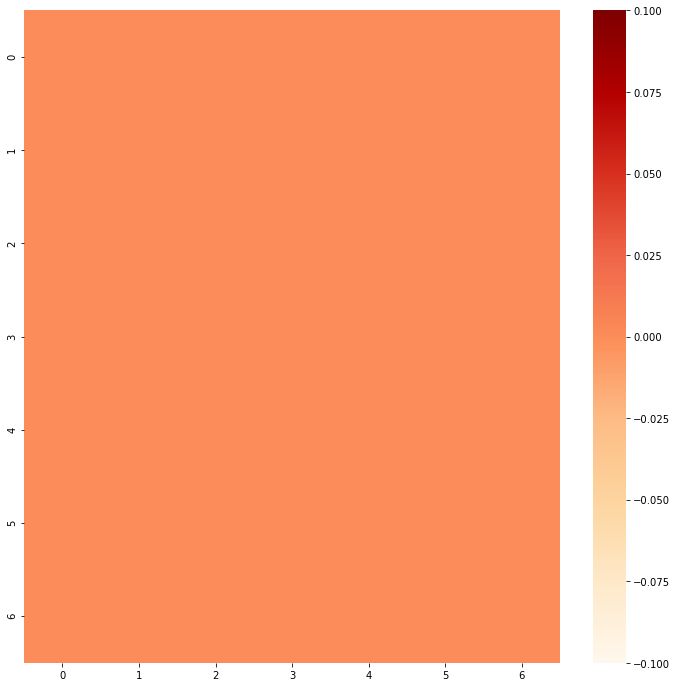

In [12]:
visits_mat = np.zeros([searcher.root.state.N, searcher.root.state.N])
plt.figure(figsize = (12, 12))
sns.heatmap(visits_mat, cmap = "OrRd")
plt.savefig("./experiment/iter_0.png".format(iter_num))
# plt.close()

In [ ]:
searcher.rooot.childre

In [11]:
print('\033[38;2;255;255;255m○\033[0m' )

○


In [ ]:
def make_graph(G, nd):
    state = nd.state
    uct = nd.CalcUCT()
    G.node(str(state), str(nd.rmsd_max) + '\n' + "{:.4}".format(float(nd.rmsd))  + '\n' + str(nd.ix) + ' ' + str(nd.iy) + '\n' + str(nd.visits) + '\n' + str(uct))
    parent_node = nd.parentNode
    if parent_node != None:
        parent_state = parent_node.state
        G.edge(str(parent_state), str(state))
    for child_node in nd.childNodes:
        make_graph(G,child_node)

In [7]:
G = Graph(format='png')
G.attr('node', shape='circle')
G.graph_attr.update(size="320")
G.node('a', '100')
G.node('b', '200')
G.edge('a', 'b')
G.render('test')

'test.png'

In [48]:
board =  [
                    [0, 0, 0, 0, 1, 0],
                    [1, 0, 0, 1, 0, 0],
                    [0, 1, 1, 0, 0, 0],
                    [0, 1, 1, 0, 0, 0],
                    [1, 0, 0, 1, 0, 0],
                    [0, 0, 0, 0, 0, 0]
                ]

In [49]:
N = 6
K = 5
def isTerminal(board):
    # 上下
    for x in range(N):
        for y in range(N-K+1):
            tmp = sum([board[x][y + i] for i in range(K)])
            if abs(tmp) == K:
                return tmp / K

    # 左右
    for y in range(N):
        for x in range(N-K+1):
            tmp = sum([board[x +i][y] for i in range(K)])
            if abs(tmp) == K:
                return tmp / K

    # 左上 右下
    for x in range(N-K+1):
        for y in range(N-K+1):
            tmp = sum([board[x+i][y+i] for i in range(K)])
            if  abs(tmp) == K:
                return tmp / K


    # 右上 左下
    for x in range(N-K+1):
        for y in range(K-1, N):
            tmp = sum([board[x+i][y-i] for i in range(K)])
            if  abs(tmp) == K:
                return tmp / K
            
    return 0

In [50]:
isTerminal(board)

1.0

In [31]:
board[0:5][4]

[0, 0, 0, 0, 1]

In [52]:
not 0

True